# OSEMN Exercises

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
rnd_list = np.random.random(10)
np.savetxt("simple_data.txt", rnd_list)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
rnd_mtr = np.random.random(size=(5,5))
np.savetxt("data.txt", rnd_mtr)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [17]:
datafromfile = np.loadtxt("data.txt")

with open("data.csv", "w+") as w:
    for j in range(datafromfile.shape[0]):
        for i in range(datafromfile.shape[1]):
            if i == (datafromfile.shape[1]-1):
                w.write(str(datafromfile[j][i]))
            else:
                w.write(str(datafromfile[j][i]))
                w.write(', ')
        w.write('\n')

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
with open('./credit_card.dat', 'r') as file:
    file_content = file.readlines() # list of rows

data = []

# row lenght
row_len = len(file_content[0]) 

dummy_chars = 4
char_len = 6
n_chars_row = int((row_len-1-dummy_chars)/char_len)

for row in file_content:
    char_row = []
    if len(row) == row_len:
        row = row[:-dummy_chars] # deleting last characters
        for i in range(n_chars_row): 
            character = row[(i*char_len):(char_len+i*char_len)]
            # character has to be first interpreted as an int from binary representation
            # then converted to a char
            character = chr(int(character,2))
            char_row.append(character) 
        data.append(char_row)

data_cc = []
# merging cc numbers
for d in data:
    s = ''
    for c in d:
        s = s+c
    data_cc.append(s)

In [6]:
# print first 10 numbers
data_cc[0:10]

['7648 5673 3775 2271',
 '3257 8247 3354 2266',
 '2722 0001 4011 6652',
 '0661 3063 3742 3150',
 '0432 1608 1462 4742',
 '5827 2027 8785 7303',
 '5774 8528 2087 1117',
 '8140 1210 6352 2845',
 '5764 1133 7301 7100',
 '6456 1737 4126 6726']

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [8]:
data5 = json.load(open("user_data.json"))
# filter data
filtered = [ d for d in data5 if(d['CreditCardType'] == 'American Express') ]

# save to csv (with Pandas)
data5_df = pd.DataFrame(filtered)
data5_df.to_csv('data5.csv')

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe what you see


In [4]:
url6 = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
data6 = pd.read_csv(url6)
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [5]:
data6.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


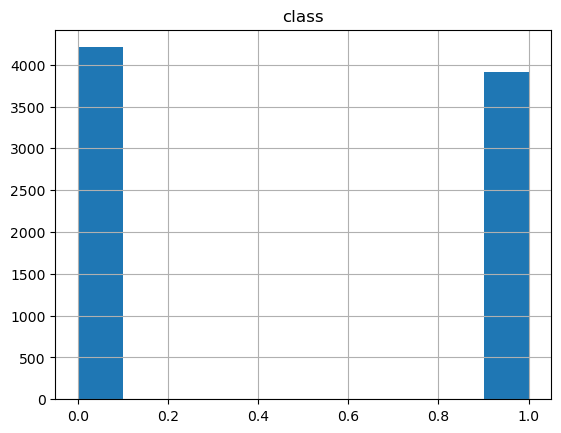

In [12]:
data6.hist('class')
plt.show()

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [9]:
url = 'https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
data7 = pd.read_csv(url)
data7.head()

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080


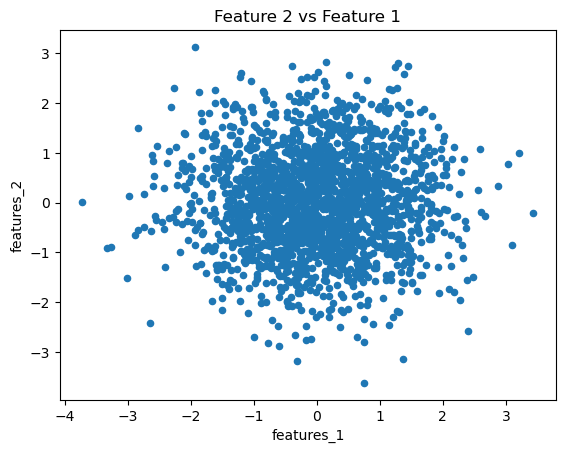

In [15]:
data7.plot.scatter('features_1', 'features_2')
plt.title('Feature 2 vs Feature 1')
plt.show()

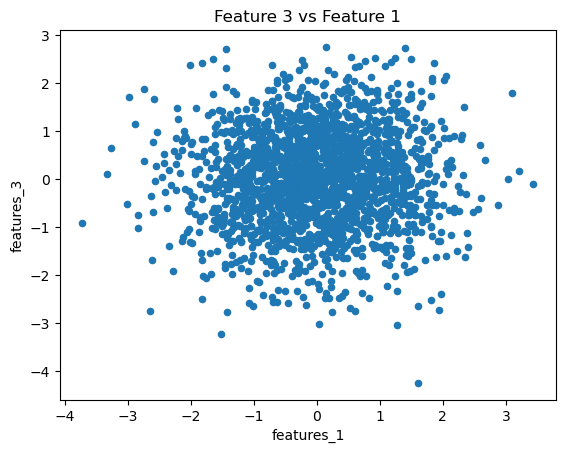

In [16]:
data7.plot.scatter('features_1', 'features_3')
plt.title('Feature 3 vs Feature 1')
plt.show()

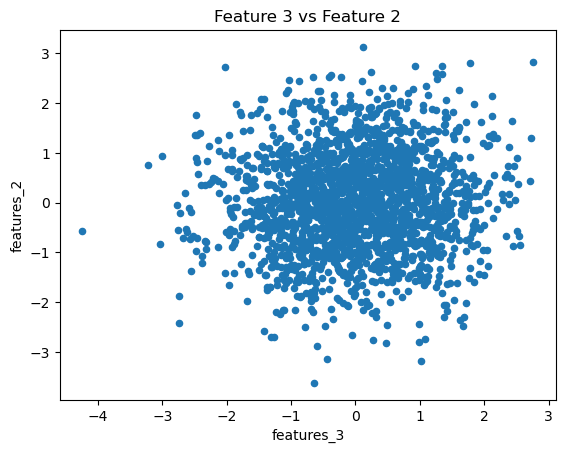

In [17]:
data7.plot.scatter('features_3', 'features_2')
plt.title('Feature 3 vs Feature 2')
plt.show()

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [10]:
data7.to_json('./data7.json')